Full dataset size: 72637 rows

Sample size: 7264 rows

LIFESTAGE distribution (counts):
LIFESTAGE
OLDER SINGLES/COUPLES     1514
RETIREES                  1465
YOUNG SINGLES/COUPLES     1423
OLDER FAMILIES             942
YOUNG FAMILIES             907
MIDAGE SINGLES/COUPLES     718
NEW FAMILIES               295
Name: count, dtype: int64 

LIFESTAGE distribution (percentages):
LIFESTAGE
OLDER SINGLES/COUPLES     20.84
RETIREES                  20.17
YOUNG SINGLES/COUPLES     19.59
OLDER FAMILIES            12.97
YOUNG FAMILIES            12.49
MIDAGE SINGLES/COUPLES     9.88
NEW FAMILIES               4.06
Name: proportion, dtype: float64 



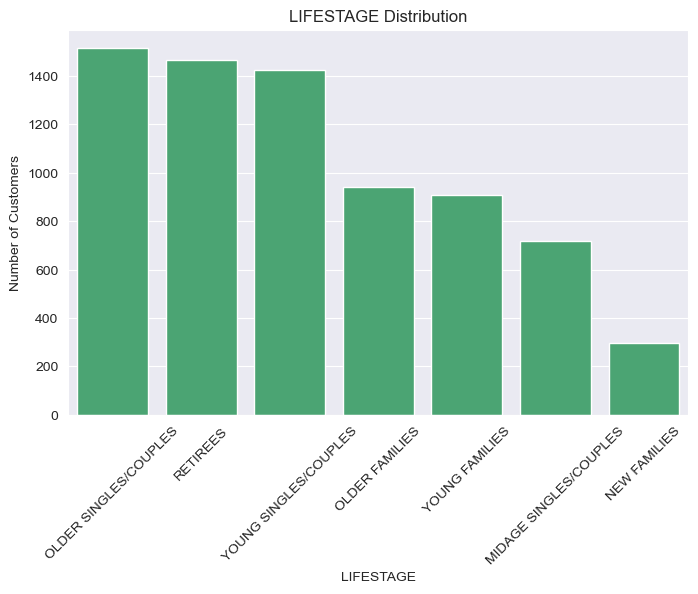

PREMIUM_CUSTOMER distribution (counts):
PREMIUM_CUSTOMER
Mainstream    2954
Budget        2405
Premium       1905
Name: count, dtype: int64 

PREMIUM_CUSTOMER distribution (percentages):
PREMIUM_CUSTOMER
Mainstream    40.67
Budget        33.11
Premium       26.23
Name: proportion, dtype: float64 



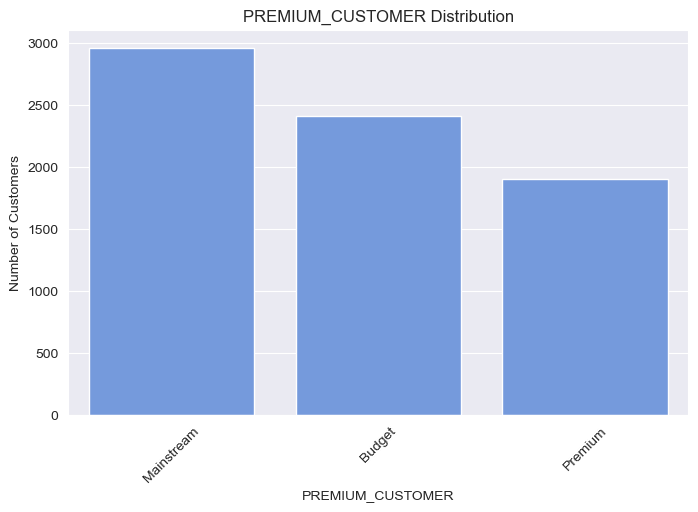

Cross-tab counts:
PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
MIDAGE SINGLES/COUPLES     131         341      246
NEW FAMILIES               129         104       62
OLDER FAMILIES             445         279      218
OLDER SINGLES/COUPLES      501         521      492
RETIREES                   428         632      405
YOUNG FAMILIES             406         261      240
YOUNG SINGLES/COUPLES      365         816      242 



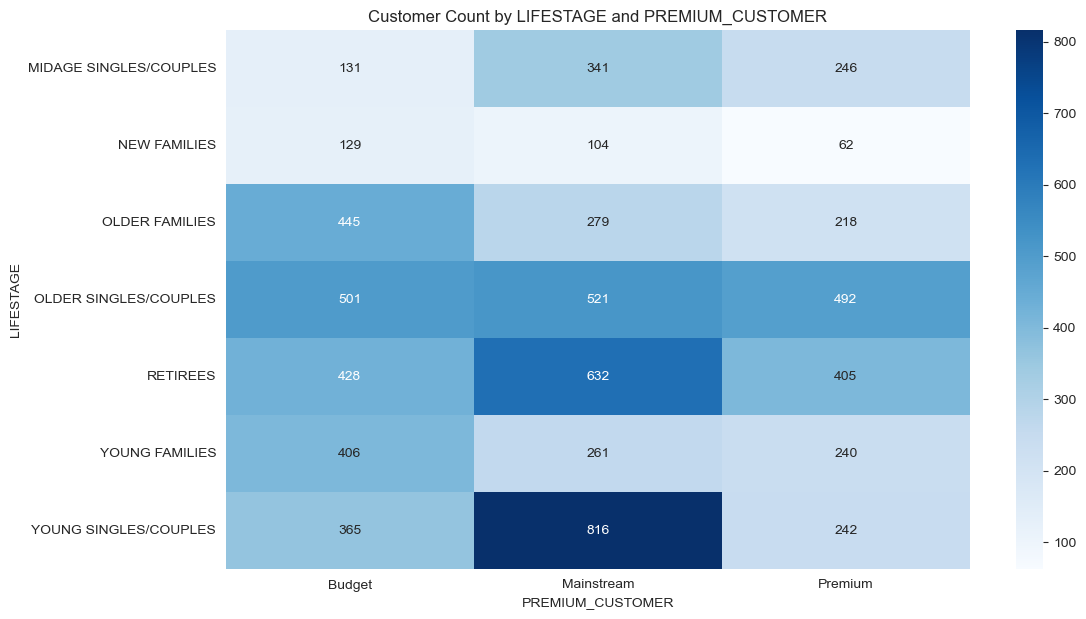

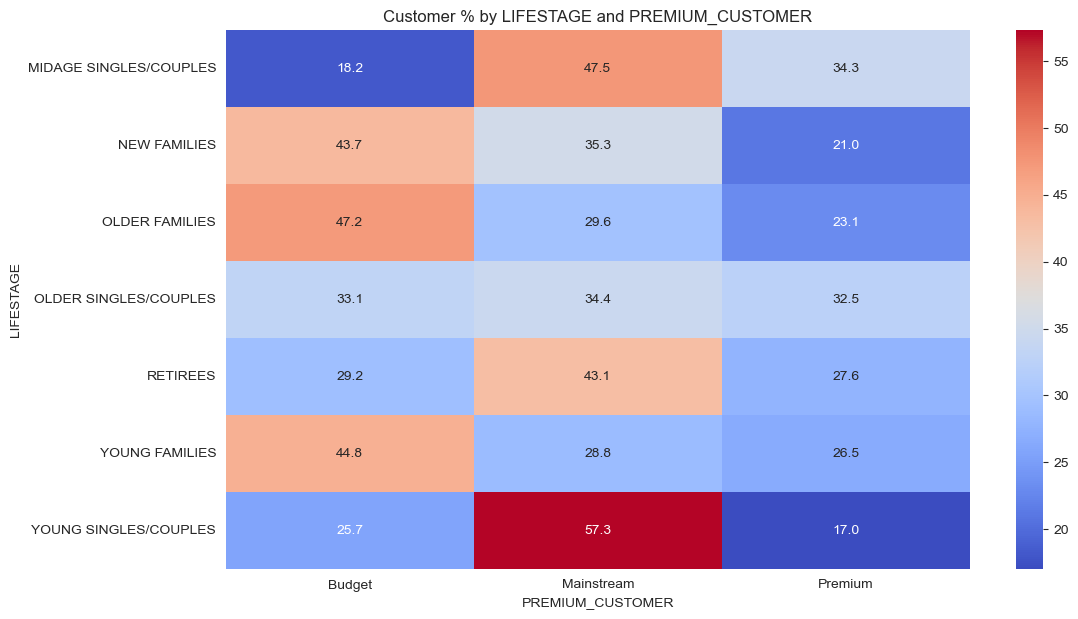

Top LIFESTAGE segments for premium products:
LIFESTAGE
OLDER SINGLES/COUPLES     492
RETIREES                  405
MIDAGE SINGLES/COUPLES    246
YOUNG SINGLES/COUPLES     242
YOUNG FAMILIES            240
OLDER FAMILIES            218
NEW FAMILIES               62
dtype: int64


In [4]:
# ----------------------------------------
# Exploratory Analysis: LIFESTAGE & PREMIUM_CUSTOMER
# ----------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Step 1: Load the dataset
# -----------------------------
# Replace 'QVI_purchase_behaviour.csv' with your dataset path
customers = pd.read_csv("QVI_purchase_behaviour.csv")
print(f"Full dataset size: {len(customers)} rows\n")

# -----------------------------
# Step 2: Sampling for faster testing
# -----------------------------
use_sample = True       # Set to False to use full dataset
sample_frac = 0.1       # 10% sample

df = customers.sample(frac=sample_frac, random_state=42) if use_sample else customers
print(f"{'Sample' if use_sample else 'Full dataset'} size: {len(df)} rows\n")

# -----------------------------
# Step 3: Analyze LIFESTAGE
# -----------------------------
lifestage_counts = df['LIFESTAGE'].value_counts()
lifestage_pct = df['LIFESTAGE'].value_counts(normalize=True) * 100

print("LIFESTAGE distribution (counts):")
print(lifestage_counts, "\n")
print("LIFESTAGE distribution (percentages):")
print(lifestage_pct.round(2), "\n")

# Bar plot for LIFESTAGE
plt.figure(figsize=(8,5))
sns.barplot(x=lifestage_counts.index, y=lifestage_counts.values, color="mediumseagreen")
plt.title("LIFESTAGE Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("LIFESTAGE")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# Step 4: Analyze PREMIUM_CUSTOMER
# -----------------------------
premium_counts = df['PREMIUM_CUSTOMER'].value_counts()
premium_pct = df['PREMIUM_CUSTOMER'].value_counts(normalize=True) * 100

print("PREMIUM_CUSTOMER distribution (counts):")
print(premium_counts, "\n")
print("PREMIUM_CUSTOMER distribution (percentages):")
print(premium_pct.round(2), "\n")

# Bar plot for PREMIUM_CUSTOMER
plt.figure(figsize=(8,5))
sns.barplot(x=premium_counts.index, y=premium_counts.values, color="cornflowerblue")
plt.title("PREMIUM_CUSTOMER Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("PREMIUM_CUSTOMER")
plt.xticks(rotation=45)
plt.show()
# -----------------------------
# Step 5: Cross-tab LIFESTAGE vs PREMIUM_CUSTOMER
# -----------------------------
lifestage_premium = pd.crosstab(df['LIFESTAGE'], df['PREMIUM_CUSTOMER'])
print("Cross-tab counts:")
print(lifestage_premium, "\n")

# Heatmap for counts
plt.figure(figsize=(12,7))
sns.heatmap(lifestage_premium, annot=True, fmt="d", cmap="Blues")
plt.title("Customer Count by LIFESTAGE and PREMIUM_CUSTOMER")
plt.ylabel("LIFESTAGE")
plt.xlabel("PREMIUM_CUSTOMER")
plt.show()

# Cross-tab percentages (row-wise)
lifestage_premium_pct = pd.crosstab(df['LIFESTAGE'], df['PREMIUM_CUSTOMER'], normalize='index') * 100
plt.figure(figsize=(12,7))
sns.heatmap(lifestage_premium_pct.round(1), annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Customer % by LIFESTAGE and PREMIUM_CUSTOMER")
plt.ylabel("LIFESTAGE")
plt.xlabel("PREMIUM_CUSTOMER")
plt.show()

# -----------------------------
# Step 6: Top LIFESTAGE segments for premium products
# -----------------------------
# Adjust the filter based on your PREMIUM_CUSTOMER categories
premium_cols = [col for col in df['PREMIUM_CUSTOMER'].unique() if 'Premium' in col or 'High' in col]

if premium_cols:
    top_lifestage_premium = lifestage_premium[premium_cols].sum(axis=1).sort_values(ascending=False)
    print("Top LIFESTAGE segments for premium products:")
    print(top_lifestage_premium)
